In [41]:
%load_ext autoreload
%autoreload 2

import math
import sys
import matplotlib.pyplot as plt

import boto3
import numpy as np

sys.path.append('../')
sys.path.append('../../')
from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from run_utils import s3_experiment_dir_name, plot_ratings_mses_s3, s3_load_trial
from reclab.environments import Topics, LatentFactorBehavior
from env_defaults import *
from reclab.recommenders import Llorma, LibFM, TopPop, PerfectRec, KNNRecommender, EASE, Autorec, RandomRec


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# S3 storage parameters
bucket_name = 'recsys-eval'
data_dir = 'master'

env_names = ['topics_static_small']
recommender_names = ['Llorma', 'LibFM']


for env_name in env_names:

    if env_name == 'topics_static':
        ENV_PARAMS = TOPICS_STATIC
    elif env_name == 'topics_dynamic':
        ENV_PARAMS = TOPICS_DYNAMIC
    elif env_name == 'latent_static':
        ENV_PARAMS = LATENT_STATIC
    elif env_name == 'latent_dynamic':
        ENV_PARAMS = LATENT_DYNAMIC
    elif env_name == 'topics_static_small':
        ENV_PARAMS = TOPICS_STATIC_SMALL
    elif env_name == 'topics_dynamic_small':
        ENV_PARAMS = TOPICS_DYNAMIC_SMALL
    elif env_name == 'latent_static_small':
        ENV_PARAMS = LATENT_STATIC_SMALL
    elif env_name == 'latent_dynamic_small':
        ENV_PARAMS = LATENT_DYNAMIC_SMALL
    else:
        assert False, "environment not implemented!"


    # Experiment setup.
    n_trials = 3
    trial_seeds = [i for i in range(n_trials)]
    num_init_ratings = ENV_PARAMS['optional_params']['num_init_ratings']
    len_trial = get_len_trial(ENV_PARAMS)
    num_users = ENV_PARAMS['params']['num_users']

    environment_name = ENV_PARAMS['name']
    env_name = ENV_PARAMS['name']

    plot_ratings_mses_s3(recommender_names,
                         len_trial,
                         bucket_name,
                         data_dir,
                         env_name,
                         trial_seeds,
                         plot_dense=False,
                         num_users=num_users,
                         num_init_ratings=num_init_ratings,
                         threshold=10,
                         title=[env_name, env_name])
    

In [102]:
bucket_name = 'recsys-eval'
data_dir = 'master'

recommender_names = ['Llorma']
n_trials = 1
trial_seeds = [i for i in range(n_trials)]

llorma_params = {
                "max_item": 1700,
                "max_user": 1000,
                "result_path": "results_static2",
                'n_anchor': 10, 
                  'pre_rank': 10, 
                  'pre_learning_rate': 5e-4,
                  'pre_lambda_val': 0.01,
                  'pre_train_steps': 100,
                  'rank': 20,
                  'learning_rate': 2e-2,
                  'lambda_val': 1e-4,
                  'train_steps': 100,
                  'batch_size': 1000,
                "use_cache": True}

recommenders = [
    Llorma(**llorma_params)
]

In [ ]:
env = Topics(**TOPICS_STATIC['params'], **TOPICS_STATIC['optional_params'])
environment_names = [TOPICS_STATIC['name']]
ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                recommenders=recommenders,
                                trial_seeds=trial_seeds,
                                len_trial=20,
                                environment_names=environment_names,
                                recommender_names=recommender_names,
                                bucket_name=bucket_name,
                                data_dir=data_dir,
                                overwrite=True)

Started experiments on environment: topics_static
	Initial density: 5.88235294117647%, Final density: 6.11764705882353%, Good item density: 29.654588235294117%
Running trials for recommender: Llorma
Running trial with seed: 0
Pre-train step: 10, train_error:1.3270473161411234
Pre-train step: 20, train_error:1.2349623985452403
Pre-train step: 30, train_error:1.1267545248653656
Pre-train step: 40, train_error:1.0555733418278426
Pre-train step: 50, train_error:0.9977399341577639
Pre-train step: 60, train_error:0.9510142055462212
Pre-train step: 70, train_error:0.9120880081000495
Pre-train step: 80, train_error:0.8798525263645117
Pre-train step: 90, train_error:0.8555731588056064
Pre-train step: 100, train_error:0.8389516556186952
Train step:10, train error: 1.1484322401076357, test error: 1.1484322401076357
Train step:20, train error: 0.8753712919796157, test error: 0.8753712919796157
Train step:30, train error: 0.6141685743706635, test error: 0.6141685743706635
Train step:40, train error

Low: 2.233, Mean: 2.977, High: 3.724
Pre-train step: 10, train_error:1.328179266415363
Pre-train step: 20, train_error:1.2304036140856909
Pre-train step: 30, train_error:1.1104704142770705
Pre-train step: 40, train_error:1.027037949825643
Pre-train step: 50, train_error:0.9643224928269071
Pre-train step: 60, train_error:0.9170273371954278
Pre-train step: 70, train_error:0.8820234184434176
Pre-train step: 80, train_error:0.8577971546303192
Pre-train step: 90, train_error:0.8426385494759677
Pre-train step: 100, train_error:0.8335952748019584
Train step:10, train error: 1.106972655149441, test error: 1.106972655149441
Train step:20, train error: 0.8425897991871544, test error: 0.8425897991871544
Train step:30, train error: 0.604868877274003, test error: 0.604868877274003
Train step:40, train error: 0.37944158046913273, test error: 0.37944158046913273
Train step:50, train error: 0.24996891309791686, test error: 0.24996891309791686
Train step:60, train error: 0.17926640934901025, test error

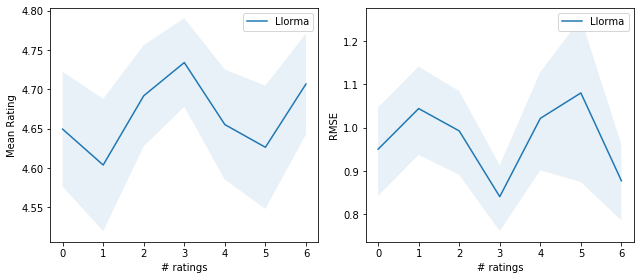

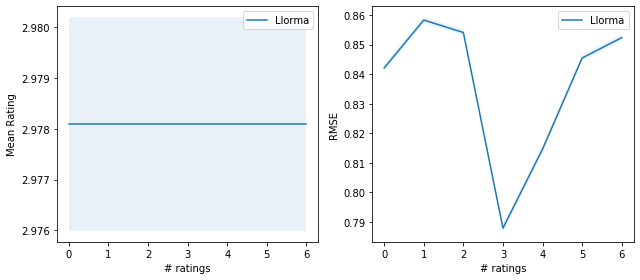

In [104]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)
plot_ratings_mses(dense_ratings[0], dense_preds[0], recommender_names)
# 50 steps of re-pre-train

In [ ]:
plot_ratings_mses(ratings[0], preds[0], recommender_names)
plot_ratings_mses(dense_ratings[0], dense_preds[0], recommender_names)
# 100 steps + re-pre-train

In [72]:
get_len_trial(TOPICS_STATIC)

500